<a href="https://colab.research.google.com/github/manishmawatwal/DataScience/blob/main/Prediction_of_Diabetes_Dataset_using_Kernel_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
# upload files on google colab drive
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
data = pd.read_csv("diabetes.csv", sep=',')

In [5]:
# display the first 10 lines
data.head(10) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.shape

(768, 9)

data['Outcome'].value_counts()

This function returns the count of unique items in a pandas dataframe.

In [8]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

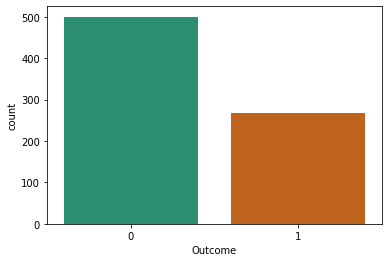

In [9]:
sns.countplot(x='Outcome',data=data, palette='Dark2')
plt.show()

Replacing zero values in BMI and Insulin columns with median values

In [11]:
bmi_median = data['BMI'].median()
data['BMI'].replace(0,bmi_median)
insulin_median = data['Insulin'].median()
data['Insulin'].replace(0,insulin_median)

0       30.5
1       30.5
2       30.5
3       94.0
4      168.0
       ...  
763    180.0
764     30.5
765    112.0
766     30.5
767     30.5
Name: Insulin, Length: 768, dtype: float64

Correlation between features/columns in the dataset

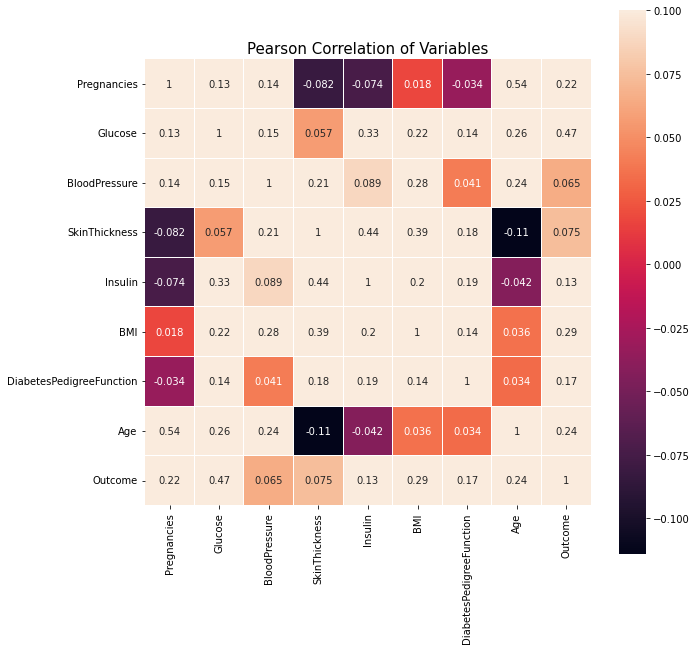

In [12]:
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Variables',y=1, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=0.1,square=True,linecolor='white',annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


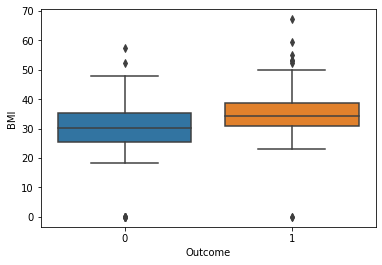

In [13]:
sns.boxplot(data.Outcome, data.BMI)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


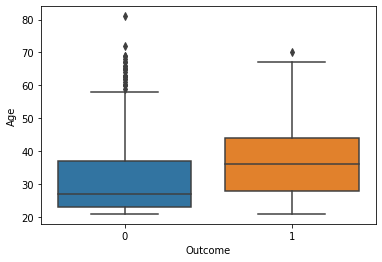

In [15]:
sns.boxplot(data.Outcome, data.Age)

Train Test Split

In [17]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

Feature Scaling


Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [19]:
sc_X = StandardScaler(with_mean=False)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Implementing Kernel SVM

In [21]:
svc_model = SVC(kernel='rbf',random_state=0)
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
y_pred = svc_model.predict(X_test)

In [25]:
print(confusion_matrix(y_test,y_pred))

[[118  12]
 [ 27  35]]


The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset.

f1=2 * (Precision * Recall)/(Precision + Recall)

Precision is the fraction of true positive examples among the examples that the model classified as positive. In other words, the number of true positives divided by the number of false positives plus true positives.

Recall, also known as sensitivity, is the fraction of examples classified as positive, among the total number of positive examples. In other words, the number of true positives divided by the number of true positives plus false negatives.

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       130
           1       0.74      0.56      0.64        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



Calculate AUC score and plot ROC curve

In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

In [29]:
auc = roc_auc_score(y_test,y_pred)
print("AUC %0.3f" %auc)

AUC 0.736


In [30]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

Sensitivity, specificity, predictive values and likelihood ratios (LRs) are all different ways of expressing test performance.

High sensitivity corresponds to high negative predictive value and is the ideal property of a “rule-out” test.

High specificity corresponds to high positive predictive value and is the ideal property of a “rule-in” test.

Receiver operating characteristic (ROC) curves compare sensitivity versus specificity across a range of values for the ability to predict a dichotomous outcome. Area under the ROC curve is another measure of test performance.

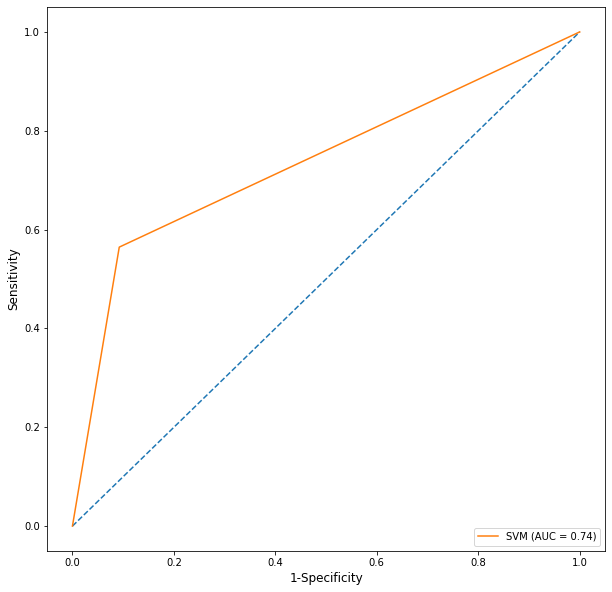

In [31]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr, label='SVM (AUC = %0.2f)'% auc)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()

Model Cross-Validation using GridSearchCV

In [33]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [34]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[117  13]
 [ 31  31]]


In [35]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       130
           1       0.70      0.50      0.58        62

    accuracy                           0.77       192
   macro avg       0.75      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



In [36]:
#Calculate AUC Score after GridSearchCV
auc_grid = roc_auc_score(y_test,grid_predictions)
print('AUC: %.3f' % auc_grid)

AUC: 0.700


In [37]:
#Calculate ROC Curve after Grid Search CV
fpr , tpr , thresholds = roc_curve(y_test,grid_predictions)

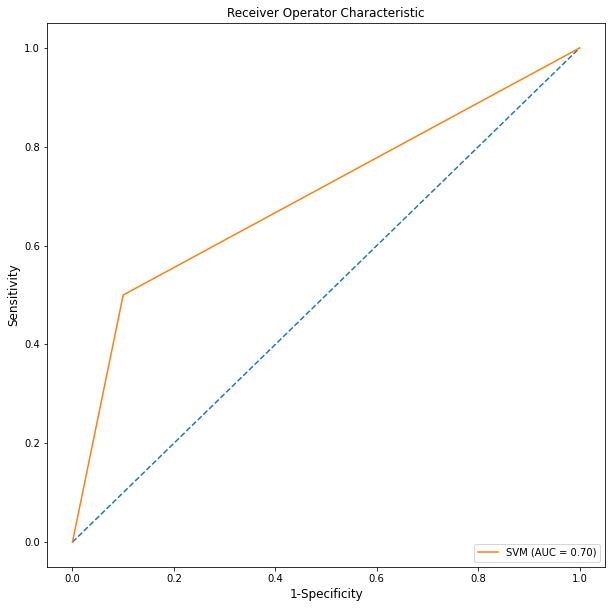

In [38]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.title('Receiver Operator Characteristic')
plt.plot(fpr,tpr, label='SVM (AUC = %0.2f)'% auc_grid)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()